# Libraries and Data Information

In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet, ElasticNetCV

from sklearn.model_selection import cross_val_score, cross_validate

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from yellowbrick.regressor import ResidualsPlot, PredictionError

import warnings
warnings.filterwarnings("ignore")

### The data set includes information about:

- This dataset captures the details of how CO2 emissions by a vehicle can vary with the different features. 

- The dataset has been taken from Canada Government official open data website. This is a compiled version.

- This contains data over a period of 7 years. There are total 7385 rows and 12 columns. 

### Feature Information

**Make:** Vehicle brand

**Model:** Vehicle model
- 4WD/4X4 = Four-wheel drive

- AWD = All-wheel drive

- FFV = Flexible-fuel vehicle

- SWB = Short wheelbase

- LWB = Long wheelbase

- EWB = Extended wheelbase


**Vehicle Class:** Vehicle class (e.g. small car, sports car, van, etc.)

**Engine Size (L):** Vehicle engine displacement (in liters)

**Cylinders:** Number of vehicle cylinders

**Transmission:** Vehicle gearbox type (manual or automatic)
- A = Automatic

- AM = Automated manual

- AS = Automatic with select shift

- AV = Continuously variable

- M = Manual

- 3 - 10 = Number of gears

**Fuel Type:** Type of fuel used (e.g. gasoline, diesel, hybrid, etc.)
- X = Regular gasoline

- Z = Premium gasoline

- D = Diesel

- E = Ethanol (E85)

- N = Natural gas

**Fuel Consumption City (L/100 km):** Fuel consumption city (liters/100 km)

**Fuel Consumption Hwy (L/100 km):** Hwy fuel consumption (liters/100 km)

**Fuel Consumption Comb (L/100 km):** Average fuel consumption (liters/100 km)

**Fuel Consumption Comb (mpg):** Fuel economy (miles per gallon)
- City and highway fuel consumption ratings are shown in litres per 100 kilometres (L/100 km) - the combined rating (55% city, 45% hwy) is shown in L/100 km and in miles per gallon (mpg)

**CO2 Emissions (g/km):** CO2 emissions per vehicle (grams/kilometer)

# Read and Check Data

In [3]:
co2 = pd.read_csv("co2.csv")
df = co2.copy()
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
# information about data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [5]:
# let's edit column names
renamed_columns = {
    'Make' : "make",
    'Model' : "model",
    'Vehicle Class': 'vehicle_class',
    'Engine Size(L)': 'engine_size',
    'Cylinders': "cylinders",
    'Transmission' : "transmission",
    'Fuel Type': 'fuel_type',
    'Fuel Consumption City (L/100 km)': 'fuel_cons_city',
    'Fuel Consumption Hwy (L/100 km)': 'fuel_cons_hwy',
    'Fuel Consumption Comb (L/100 km)': 'fuel_cons_comb',
    'Fuel Consumption Comb (mpg)': 'mpgfuel_cons_comb',
    'CO2 Emissions(g/km)': 'co2'
}
df.rename(renamed_columns, axis='columns', inplace=True)

In [6]:
# let's check our missing values
df.isnull().sum()

make                 0
model                0
vehicle_class        0
engine_size          0
cylinders            0
transmission         0
fuel_type            0
fuel_cons_city       0
fuel_cons_hwy        0
fuel_cons_comb       0
mpgfuel_cons_comb    0
co2                  0
dtype: int64

In [7]:
# describe basic statistics of data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
engine_size,7385.0,3.160068,1.354170,0.9,2.0,3.0,3.7,8.4
cylinders,7385.0,5.615030,1.828307,3.0,4.0,6.0,6.0,16.0
fuel_cons_city,7385.0,12.556534,3.500274,4.2,10.1,12.1,14.6,30.6
fuel_cons_hwy,7385.0,9.041706,2.224456,4.0,7.5,8.7,10.2,20.6
fuel_cons_comb,7385.0,10.975071,2.892506,4.1,8.9,10.6,12.6,26.1
mpgfuel_cons_comb,7385.0,27.481652,7.231879,11.0,22.0,27.0,32.0,69.0
co2,7385.0,250.584699,58.512679,96.0,208.0,246.0,288.0,522.0


In [8]:
# Let's observe our data in a table 

def get_unique_values(df):
    
    output_data = []

    for col in df.columns:

        # If the number of unique values in the column is less than or equal to 5
        if df.loc[:, col].nunique() <= 10:
            # Get the unique values in the column
            unique_values = df.loc[:, col].unique()
            # Append the column name, number of unique values, unique values, and data type to the output data
            output_data.append([col, df.loc[:, col].nunique(), unique_values, df.loc[:, col].dtype])
        else:
            # Otherwise, append only the column name, number of unique values, and data type to the output data
            output_data.append([col, df.loc[:, col].nunique(),"-", df.loc[:, col].dtype])

    output_df = pd.DataFrame(output_data, columns=['Column Name', 'Number of Unique Values', ' Unique Values ', 'Data Type'])

    return output_df

In [9]:
get_unique_values(df)

,Column Name,Number of Unique Values,Unique Values,Data Type
0,make,42,-,object
1,model,2053,-,object
2,vehicle_class,16,-,object
3,engine_size,51,-,float64
4,cylinders,8,"[4, 6, 12, 8, 10, 3, 5, 16]",int64
5,transmission,27,-,object
6,fuel_type,5,"[Z, D, X, E, N]",object
7,fuel_cons_city,211,-,float64
8,fuel_cons_hwy,143,-,float64
9,fuel_cons_comb,181,-,float64


- The columns Engine Size(L), Cylinders, Fuel Consumption City (L/100 km), Fuel Consumption Hwy (L/100 km), Fuel Consumption Comb (L/100 km), Fuel Consumption Comb (mpg) and CO2 Emissions(g/km) are numerical and continuous in nature.
- The columns Make, Model, Vehicle Class, Transmission and Fuel Type are categorical in nature.

In [10]:
# Duplicated data

df_duplicated = df[df.duplicated() == True]
df_duplicated.shape

(1103, 12)

* There are duplicate rows in the data set. However, since I will be using a linear model, I do not plan to delete these rows because duplicate rows contain similar values. Linear regression tries to find the general trend of the data points and the fact that duplicate rows contain similar values does not lead to a major change in the model's predictions.

# Categorical Features

* Let's look at the distribution of our categorical characteristics with a bar graph

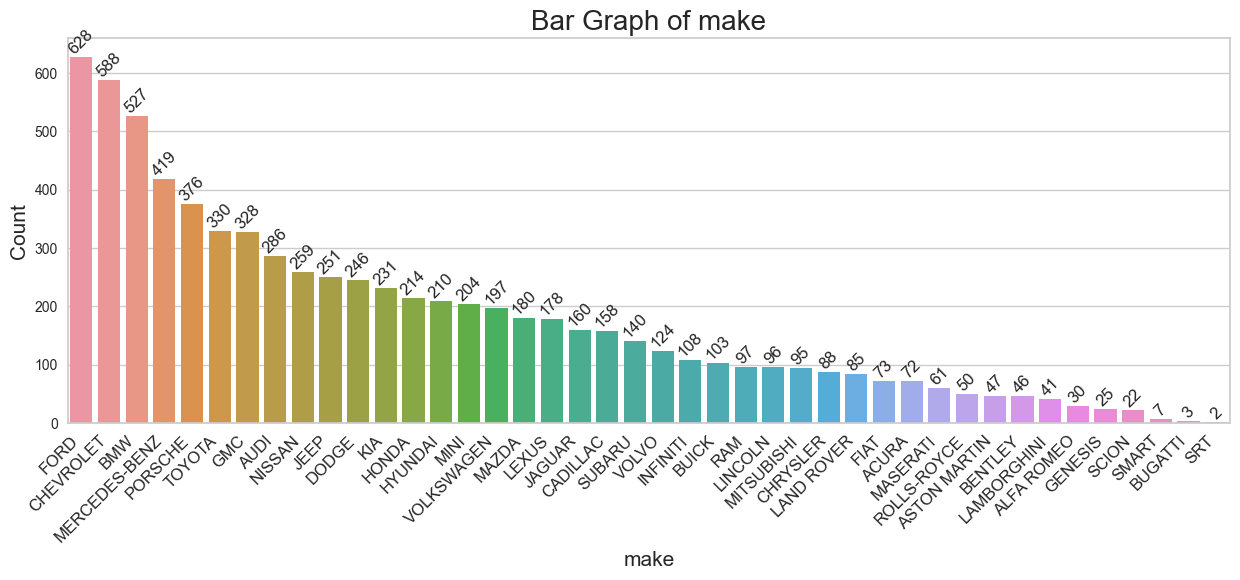

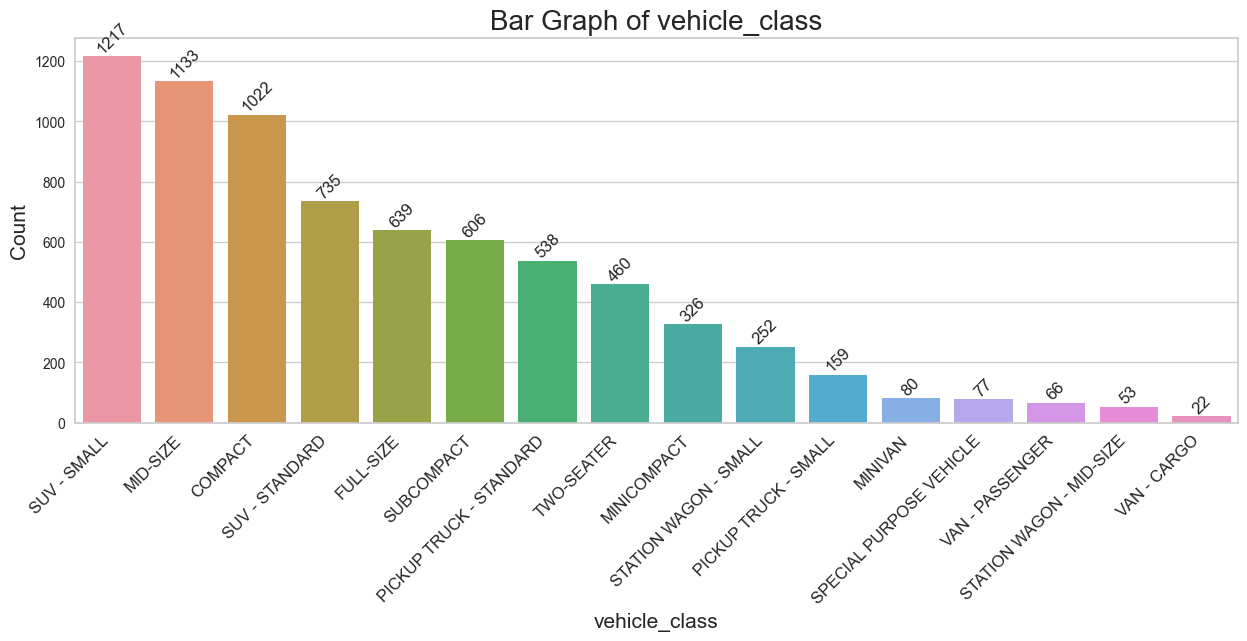

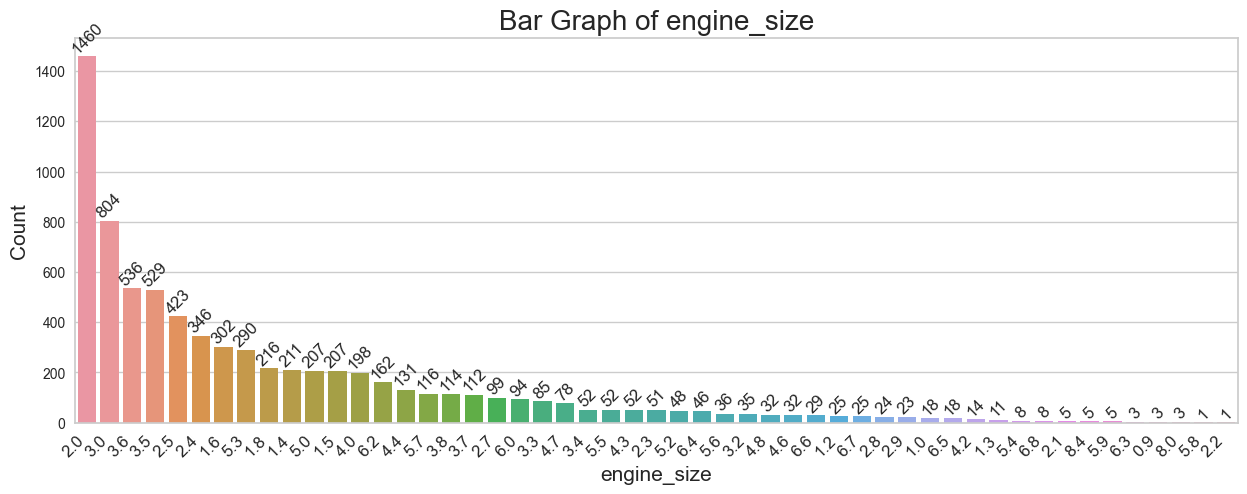

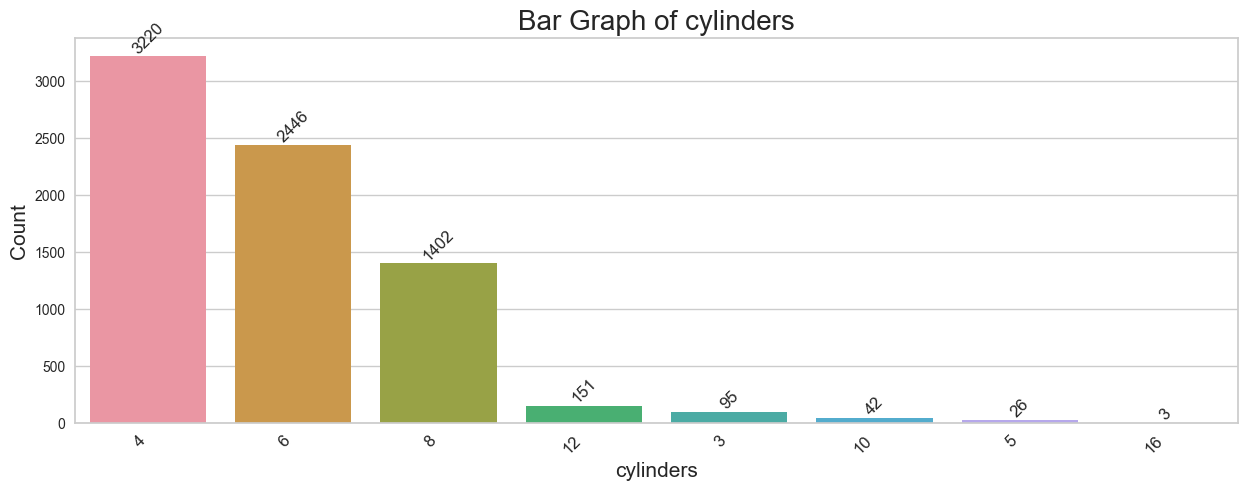

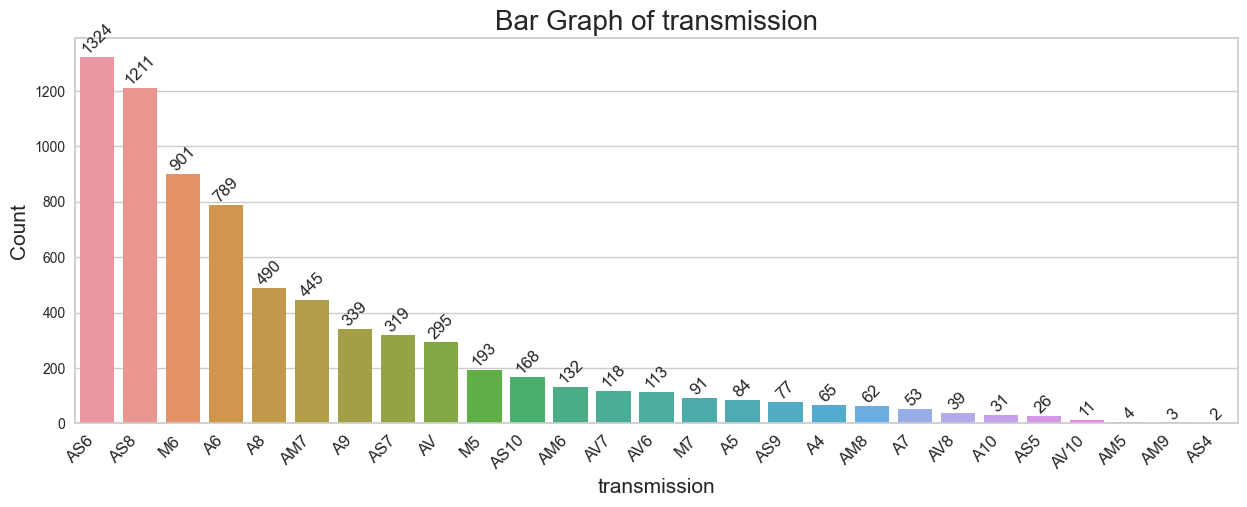

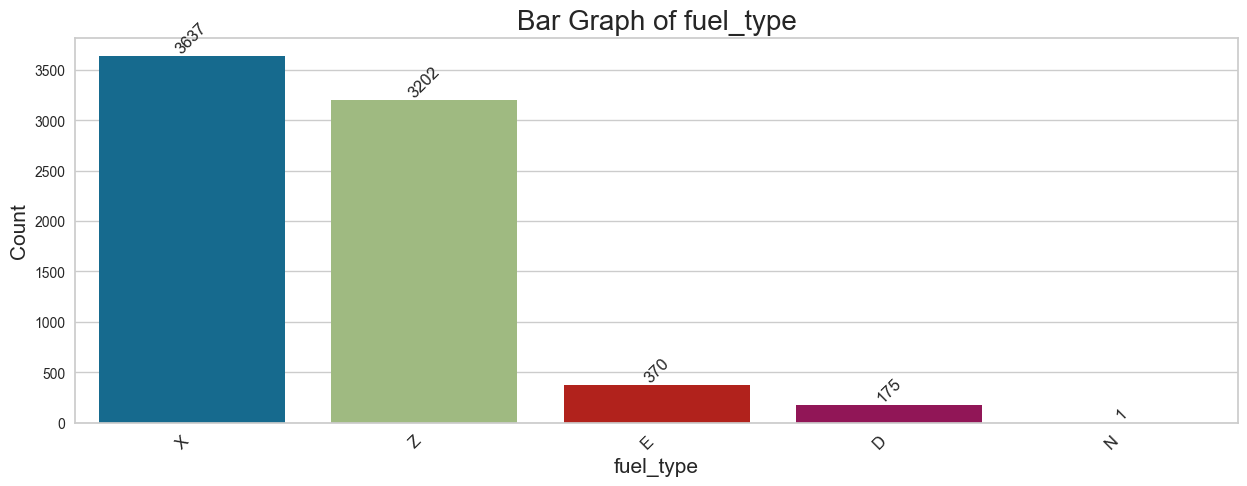

In [11]:
def plot_bar_graphs(df, columns):
    for column in columns:
        plt.figure(figsize=(15, 5))
        ax = sns.countplot(x=column, data=df, order=df[column].value_counts().index)
        ax.bar_label(ax.containers[0],rotation=45)
        plt.xlabel(column, fontsize=15)
        plt.ylabel('Count', fontsize=15)
        plt.title(f'Bar Graph of {column}', fontsize=20)
        plt.xticks(rotation=45, ha='right', fontsize=12)
        plt.show()
        
cat_features = ['make', 'vehicle_class', 'engine_size', 'cylinders', 'transmission', 'fuel_type']

plot_bar_graphs(df, cat_features)

As can be seen from the graphs above:

* The number of vehicles consuming diesel, ethanol and natural gas fuel in the data set is very small.
* Widespread use of AS6, AS8, M6, A6, A9 as transmission options
* 4, 6, 8 are commonly used as cylinders option
* Engine Size (L) with 2.0 and 3.0 options in density
* The dataset is generally dominated by smaller sized vehicles

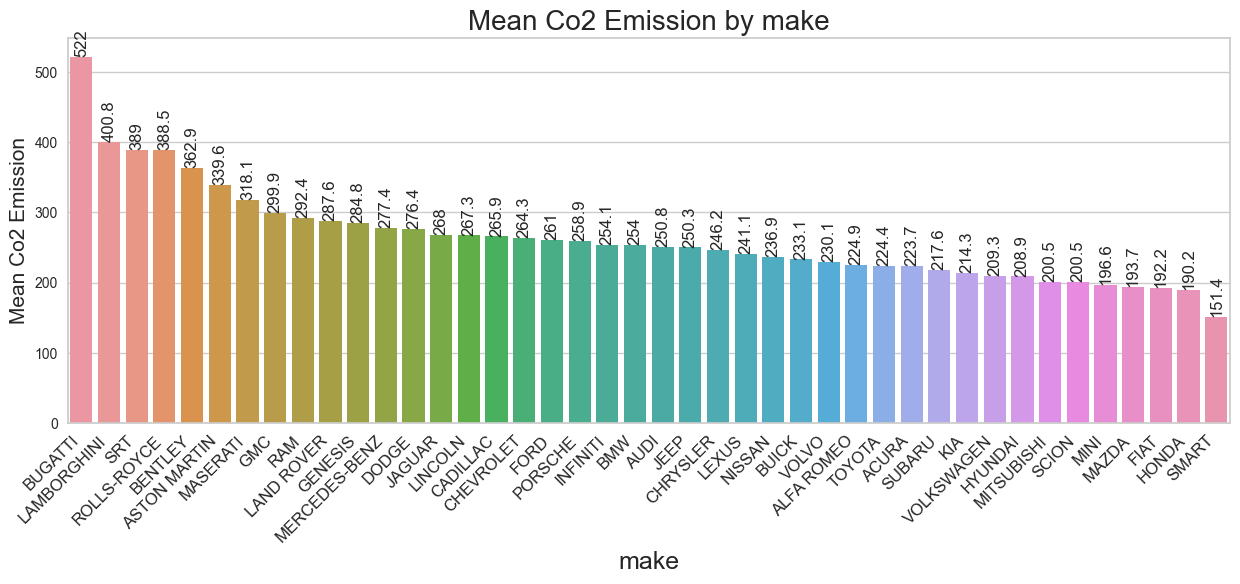

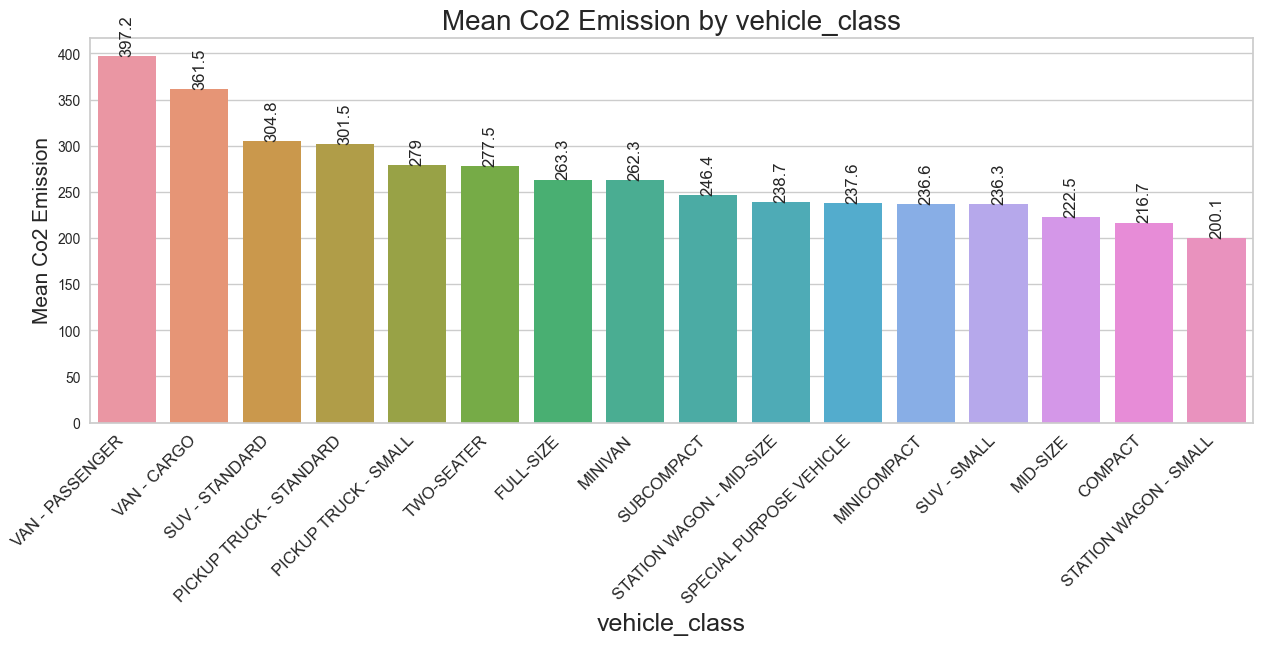

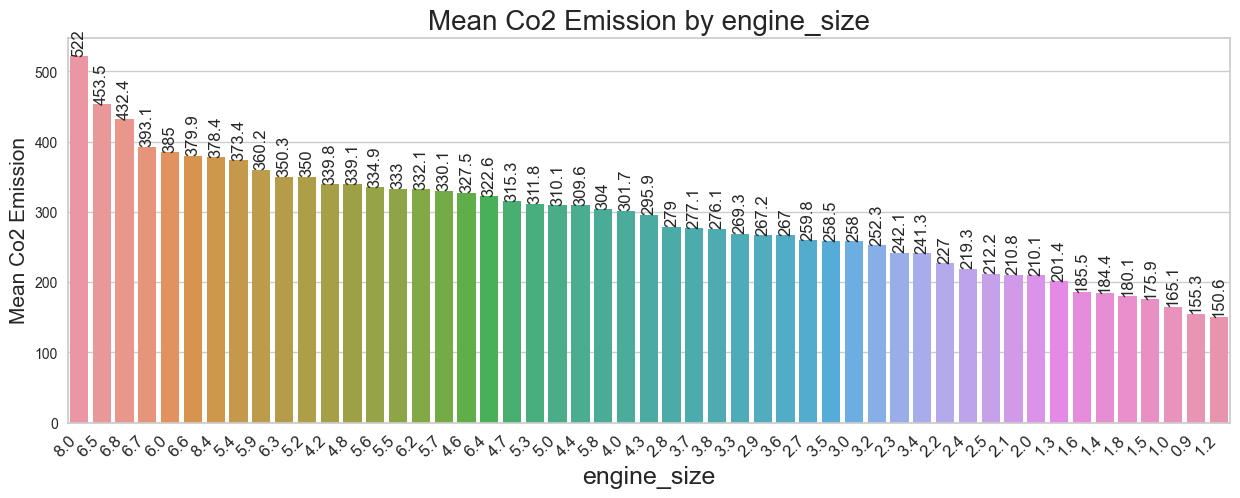

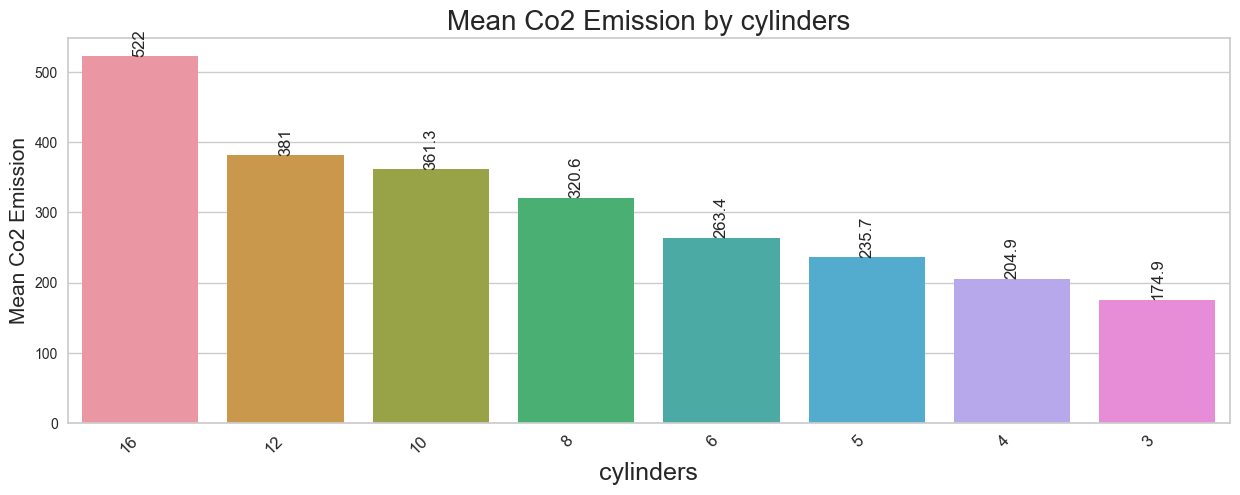

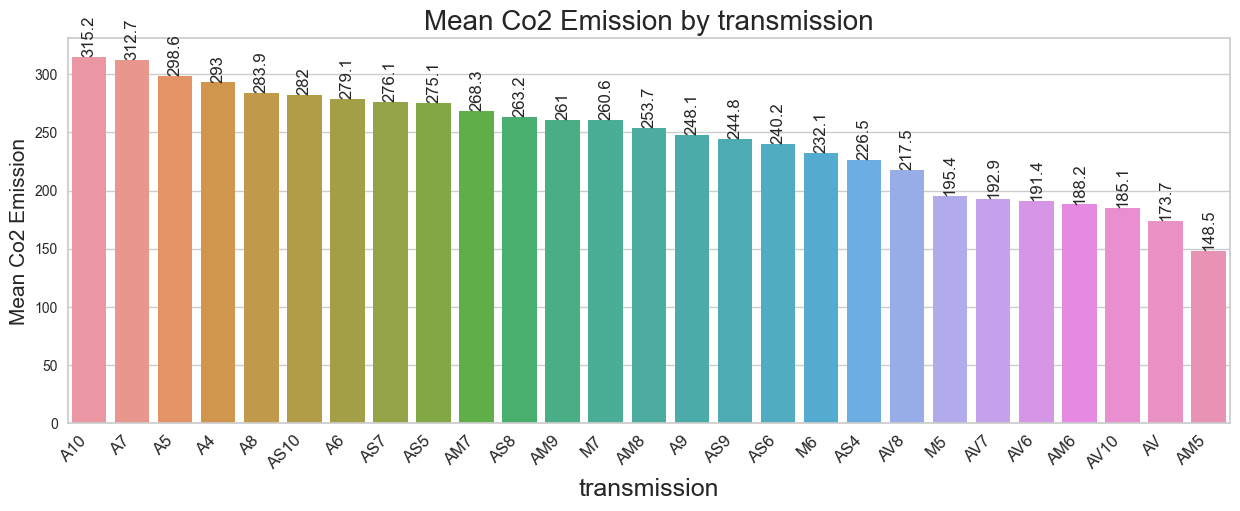

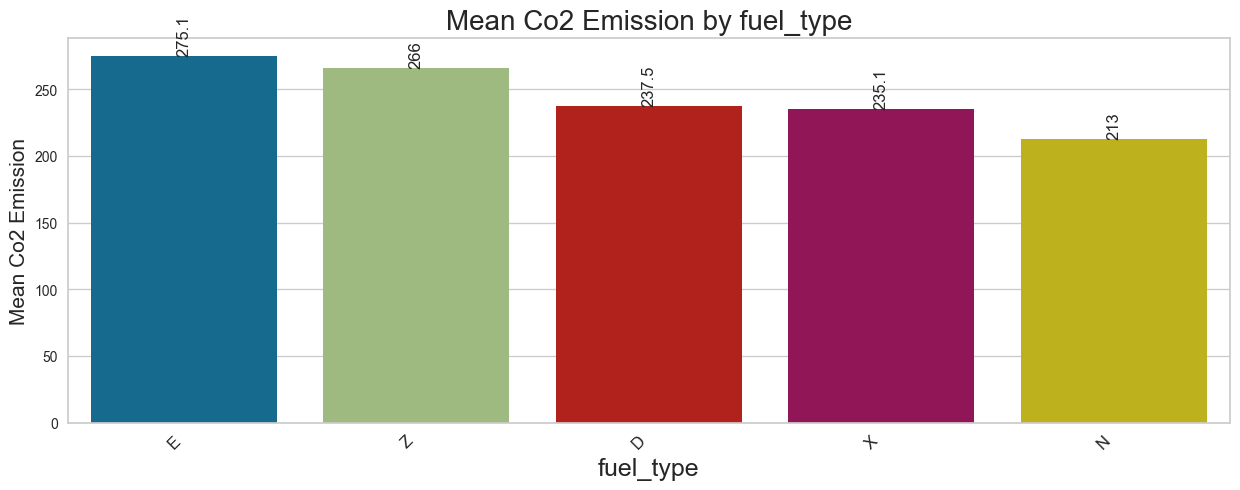

In [12]:
# Let's look at the relationship between our categorical attributes and the target variable

def plot_bar_with_co2(df, columns):
    for column in columns:
        plt.figure(figsize=(15, 5))
        grouped_data = df.groupby(column)['co2'].mean().round(1).reset_index()
        grouped_data_sorted = grouped_data.sort_values(by='co2', ascending=False)
        ax = sns.barplot(x=column, y='co2', data=grouped_data_sorted, order=grouped_data_sorted[column])
        ax.bar_label(ax.containers[0],rotation=90)
        plt.xlabel(column, fontsize=18)
        plt.ylabel('Mean Co2 Emission', fontsize=15)
        plt.title(f'Mean Co2 Emission by {column}', fontsize=20)
        plt.xticks(rotation=45, ha='right', fontsize=12)
        plt.show()
        
plot_bar_with_co2(df, cat_features)

As can be seen from the graphs above:

* Bugatti has the highest average Co2 emissions
* Large-volume vehicles have high CO2 emission averages
* C02 emission averages of high volume and cylinders engines are also high
* Ethanol is the fuel with the highest average CO2

# Numerical Features

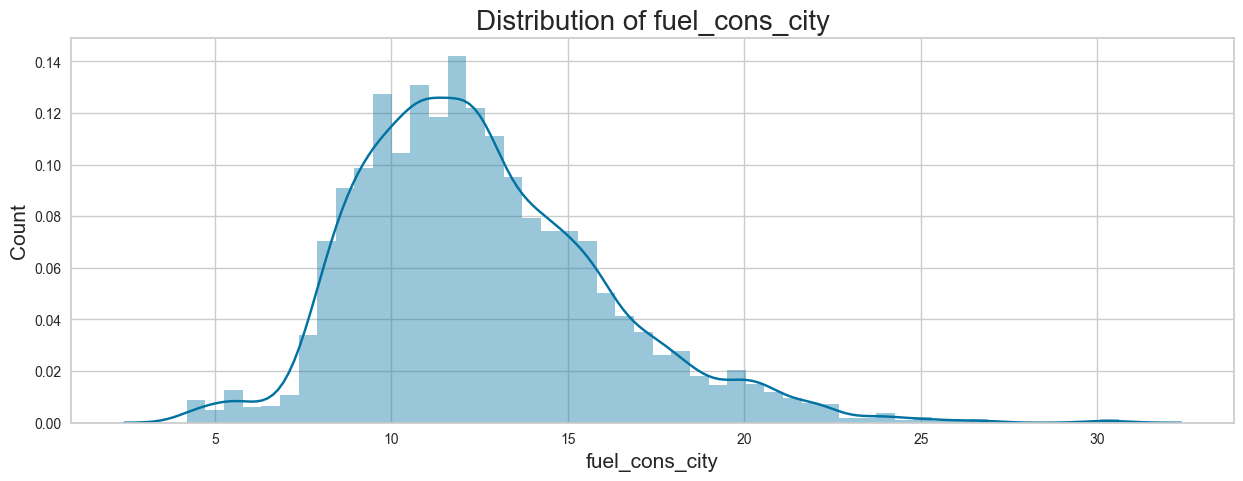

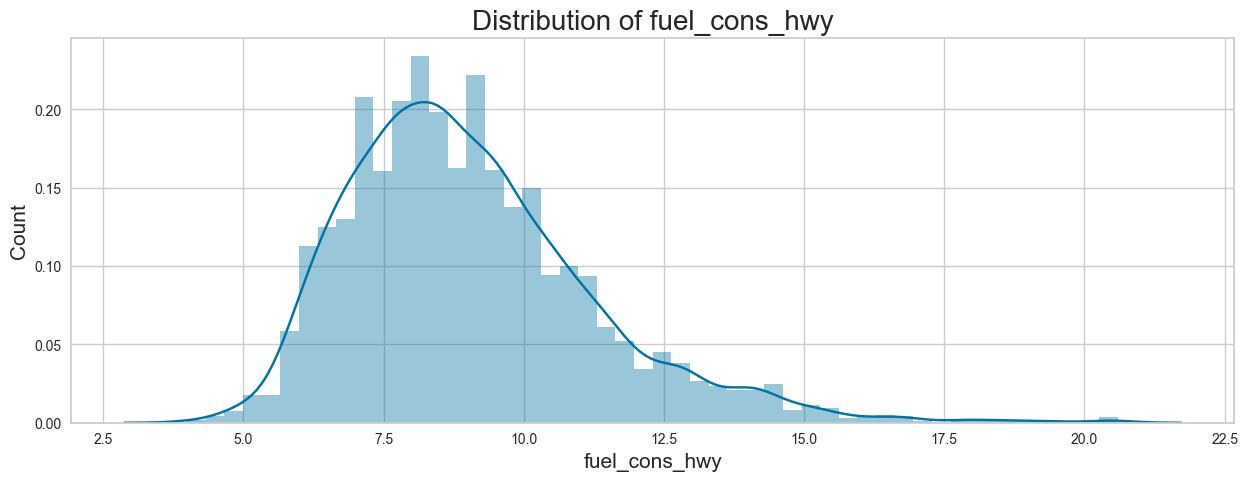

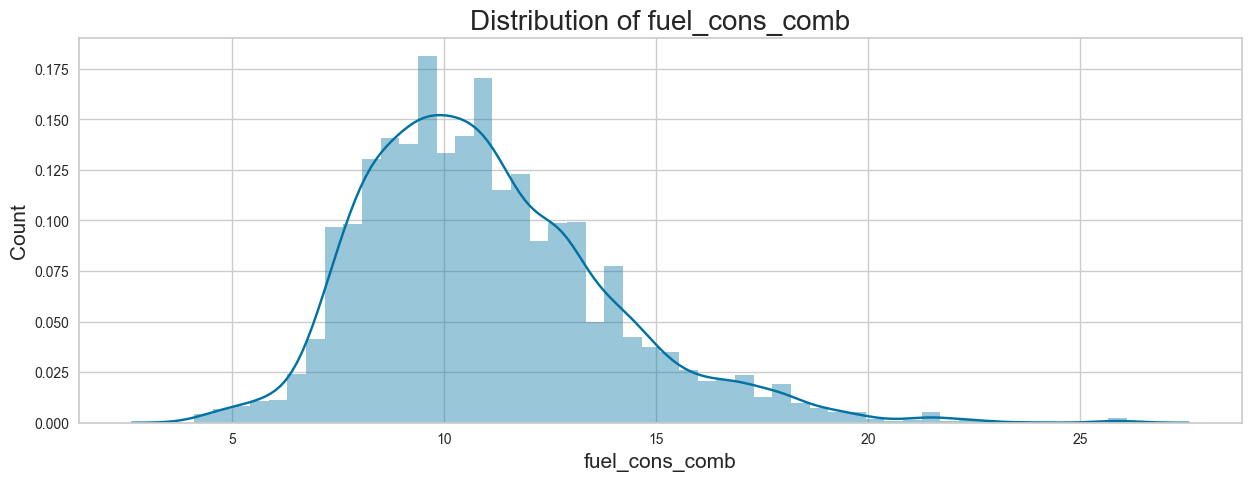

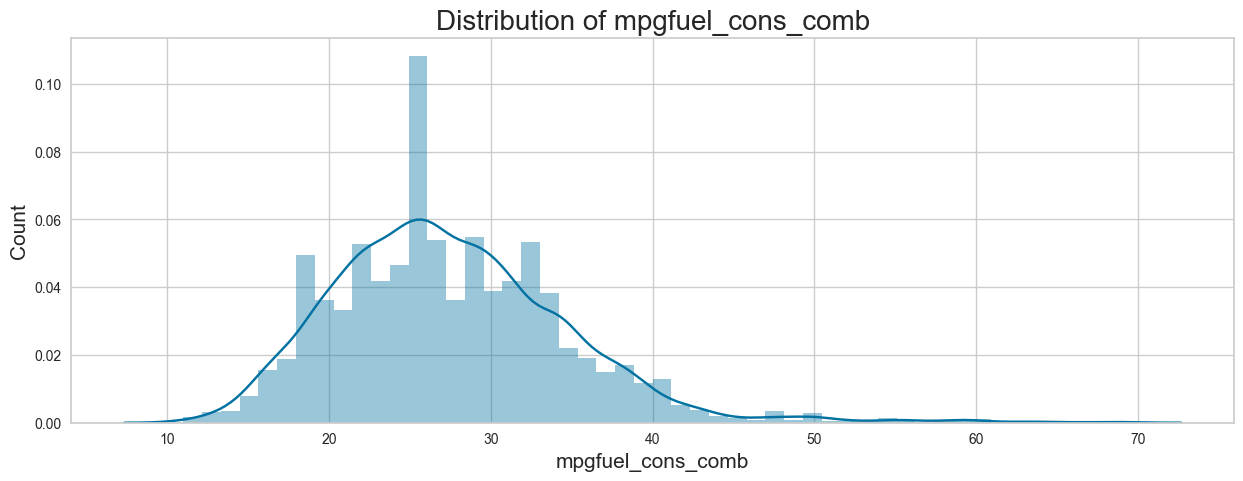

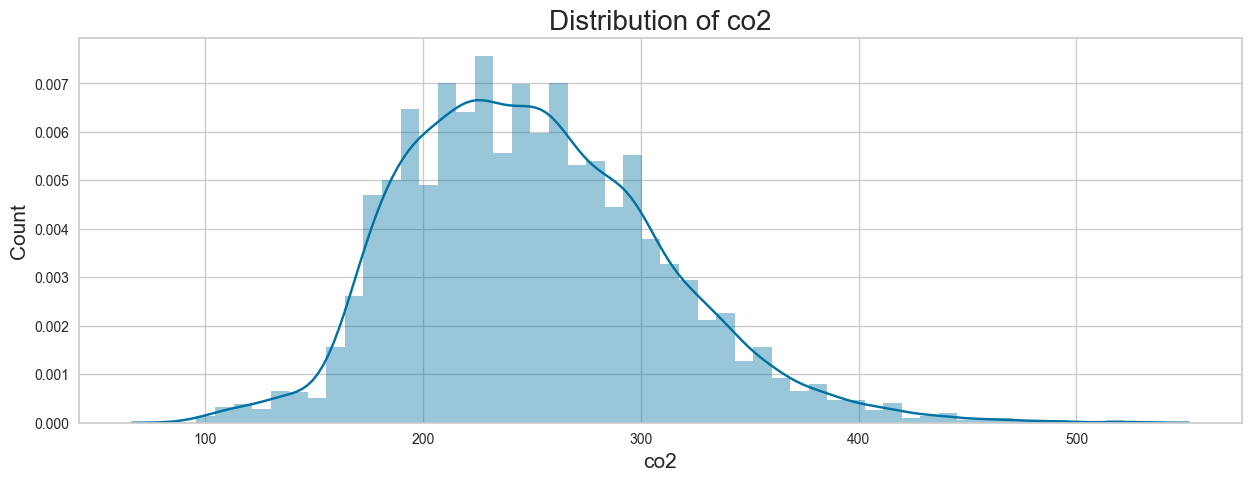

In [15]:
def numerical_dist(df, columns):
    for column in columns:
        plt.figure(figsize=(15, 5))
        sns.distplot(x=df[column])
        plt.xlabel(column, fontsize=15)
        plt.ylabel('Count', fontsize=15)
        plt.title(f'Distribution of {column}', fontsize=20)
        plt.show()
        
num_features = ['fuel_cons_city', 'fuel_cons_hwy','fuel_cons_comb', 'mpgfuel_cons_comb', 'co2']

numerical_dist(df, num_features)

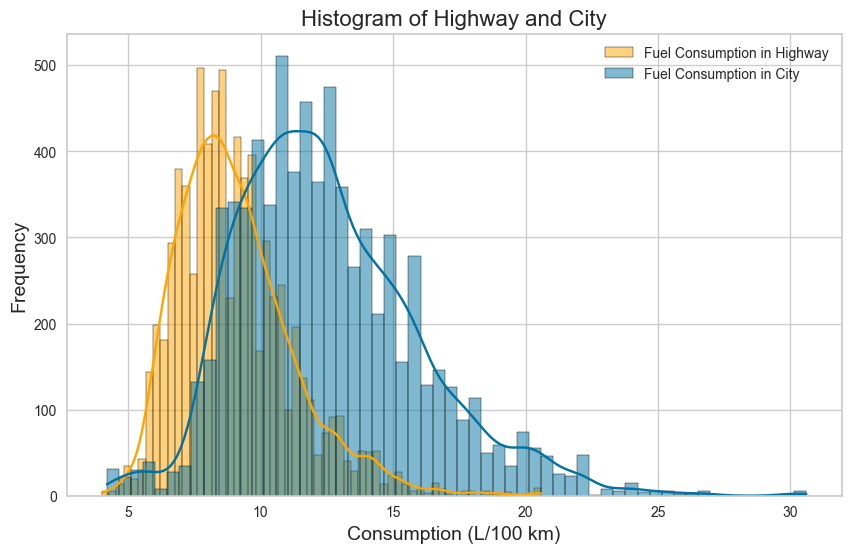

In [14]:
# Consumption of Highway and City

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="fuel_cons_hwy", kde=True, label = "Fuel Consumption in Highway",color = "orange")
sns.histplot(data=df, x="fuel_cons_city", kde=True, label = "Fuel Consumption in City")
plt.xlabel('Consumption (L/100 km)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title(f'Histogram of Highway and City', fontsize=16)
plt.legend()
plt.show()


* As can be seen from the graph, fuel consumption on highways is higher

# Outliers Check

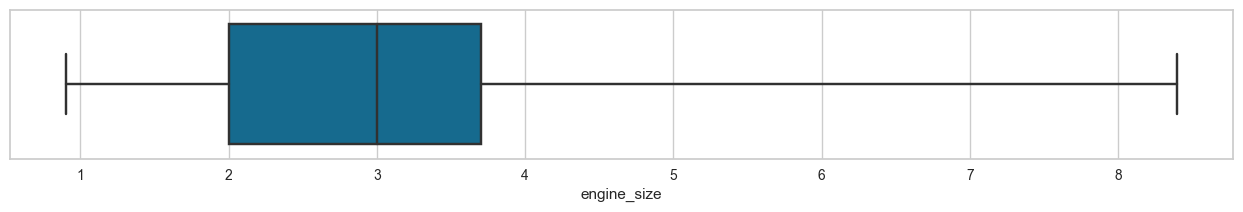

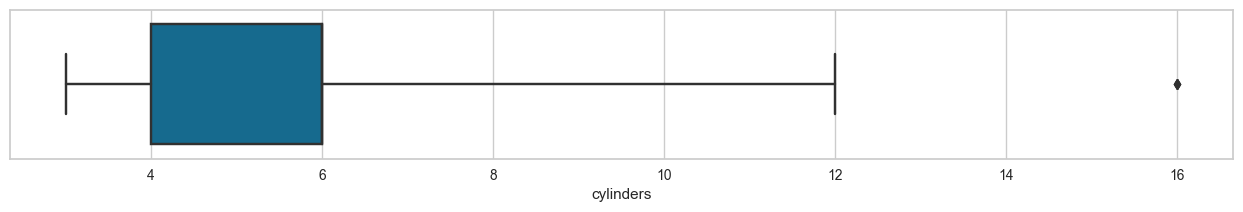

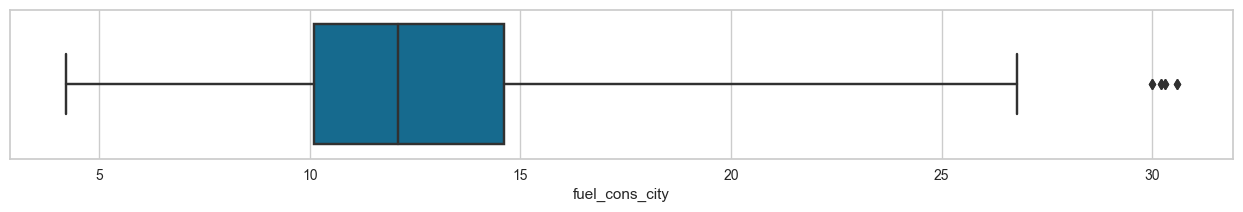

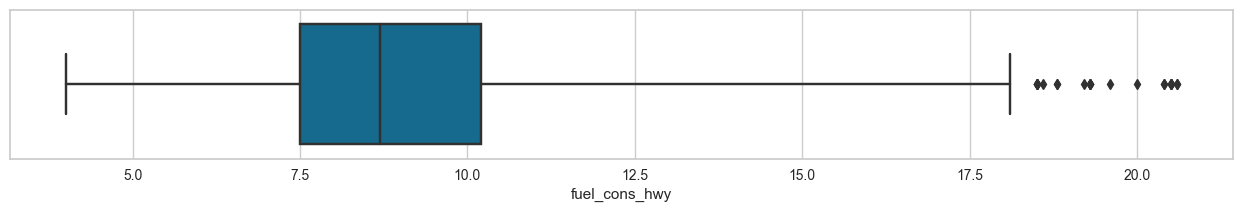

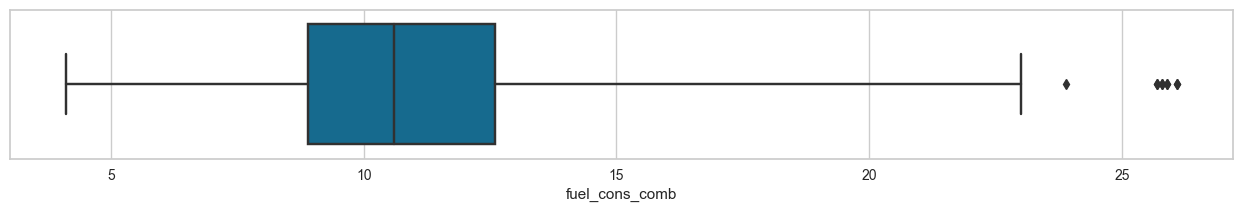

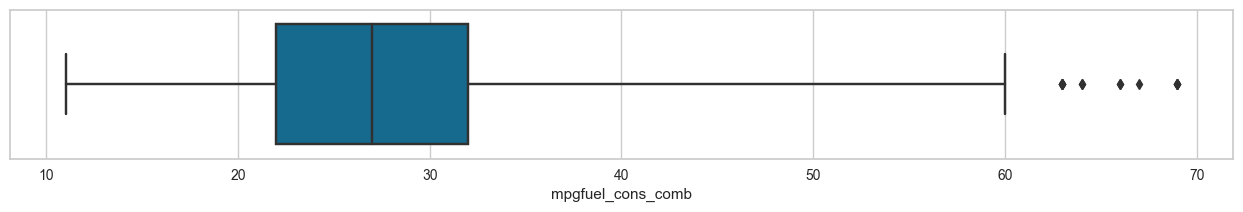

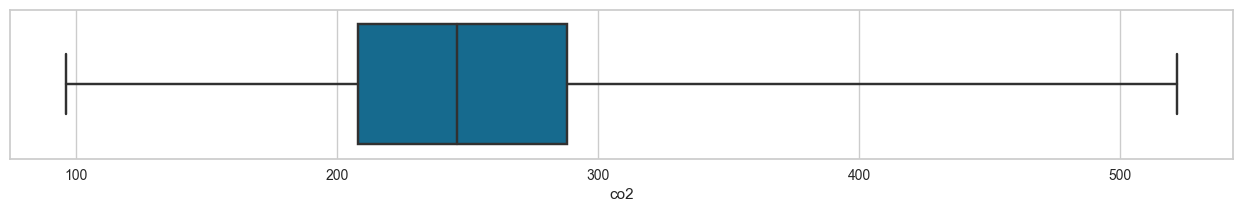

In [13]:
index=0
for feature in df.select_dtypes('number').columns:
    index+=1
    plt.figure(figsize=(25,25))
    plt.subplot((len(df.columns)),2,index)
    sns.boxplot(x=feature,data=df,whis=3) 
        
    plt.tight_layout()
    
    plt.show()

* We do not intervene with outliers at the moment, but we can take action later according to the model's forecasting performance.

In [ ]:
df.columns

In [ ]:
df[df["fuel_cons_comb"] > 25 ]

# Correlation

* Fuel Consumption Comb (mpg) is negatively correlated to all the features.
* All the other features are postively correlated with each other

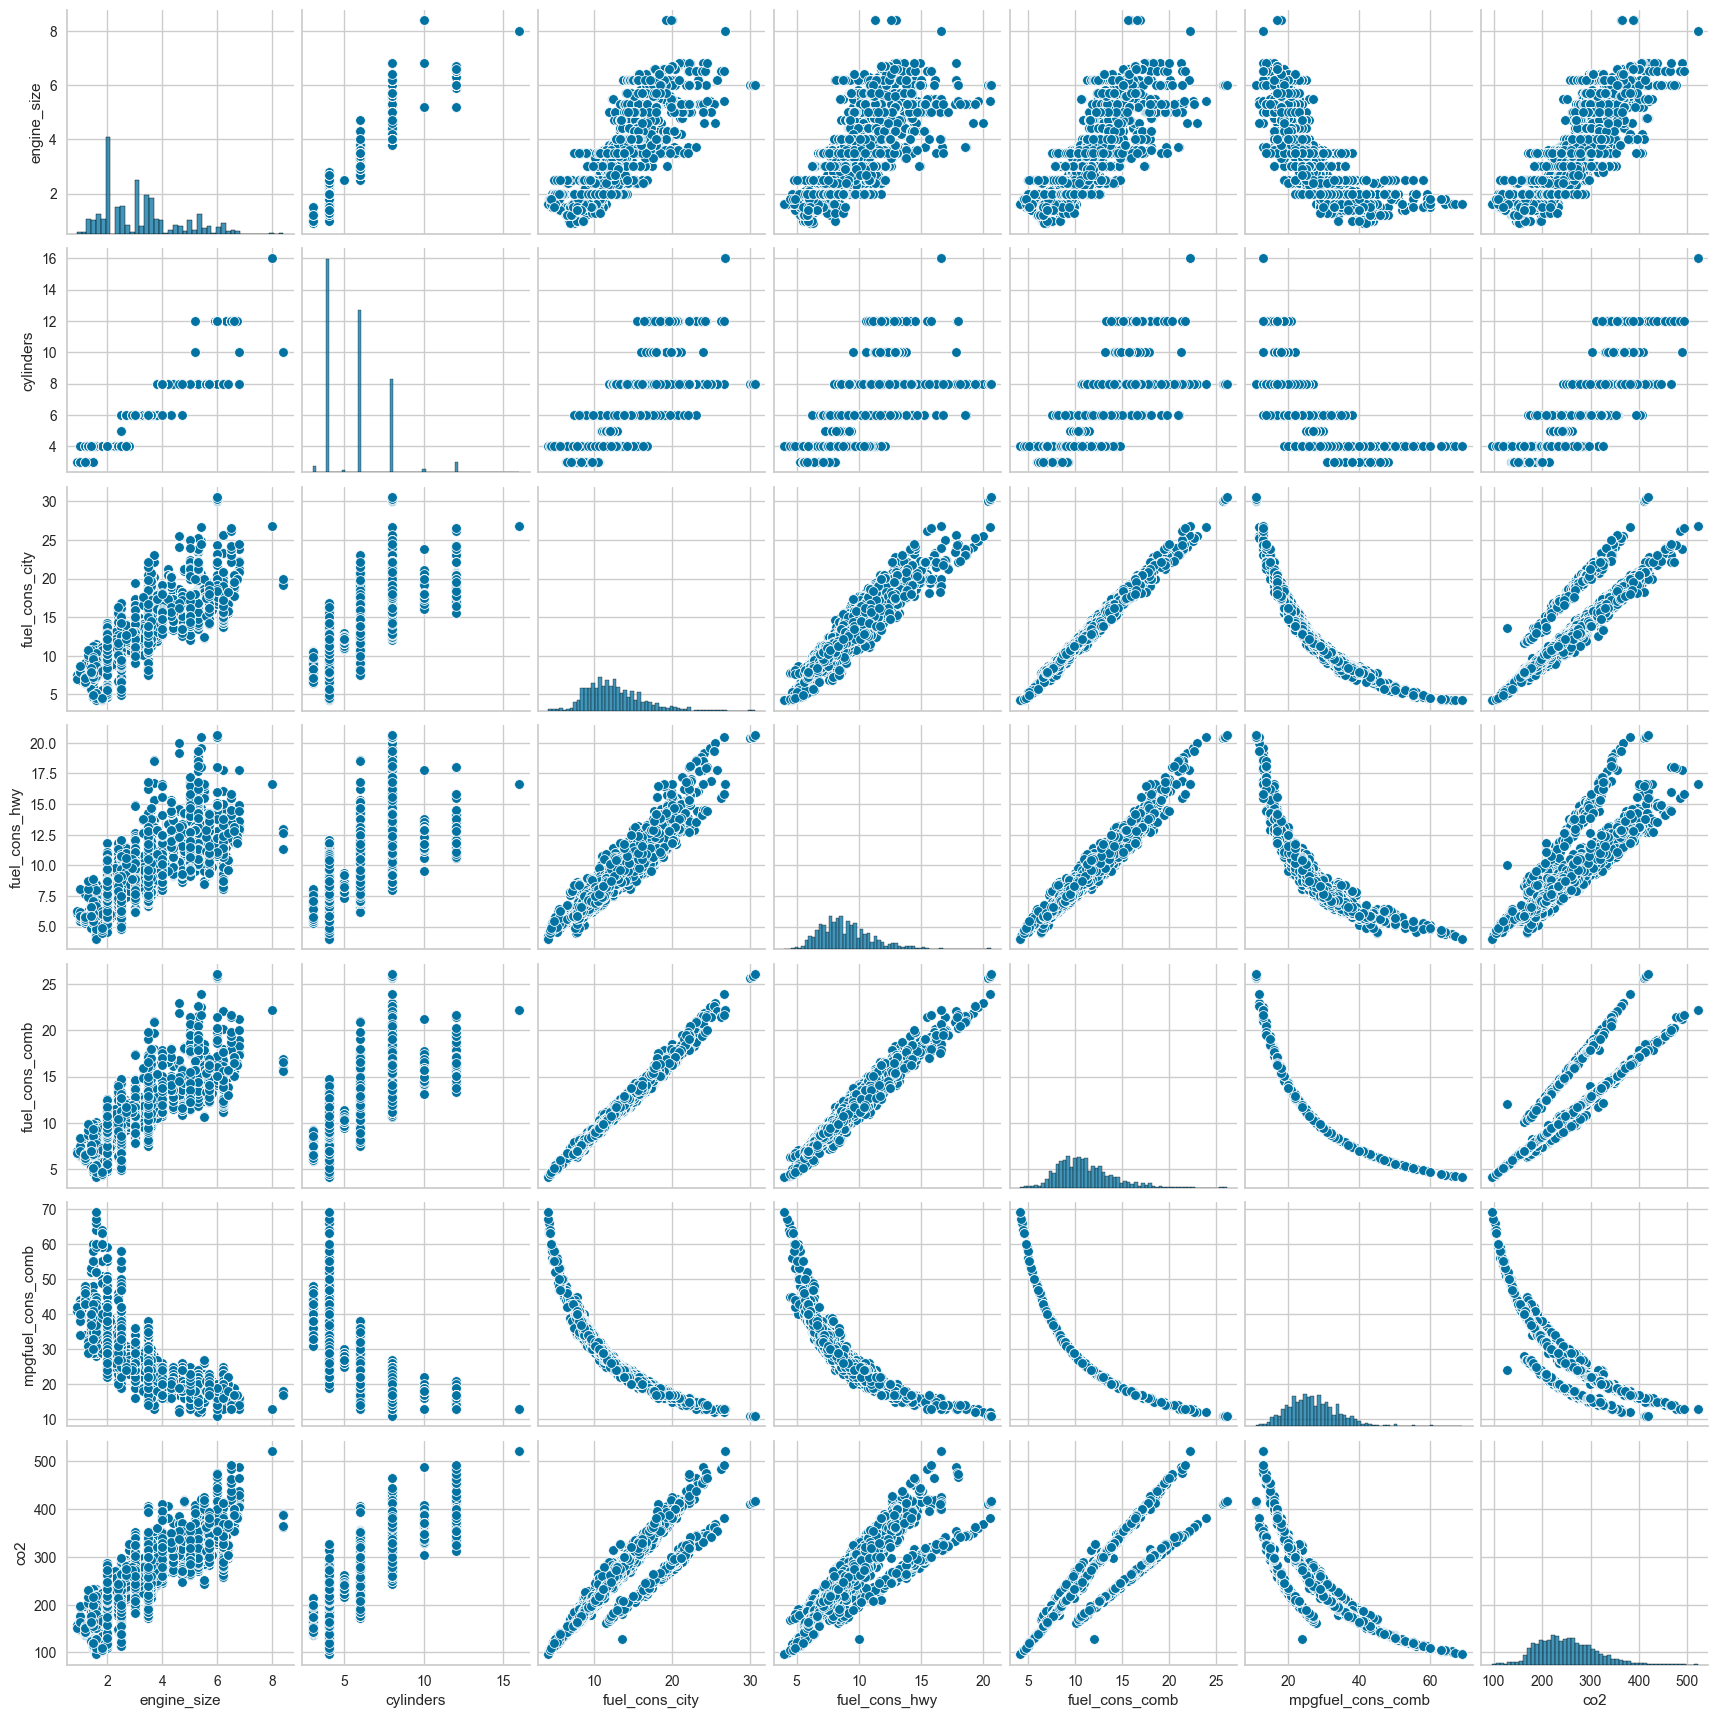

In [16]:
# We can look at our features more generally 
sns.pairplot(df)
plt.show()

* When we look at the distribution of our target variable with the other features, the linear relationship between them shows that our linear model will perform well.
* In fact, it is clear from the following table that I hope to get high predictions with only numeric columns without using any categorical columns
* For our model, we can choose the column fuel_cons_comb, which is the combination of city and highway in fuel consumption. The other two will cause multicollinearity. So we can choose the following numerical columns

-engine_size

-cylinders

-fuel_cons_comb

-mpgfuel_cons_comb

# Modelling

## Simple Lineer Regression

### Train-Test Split

In [55]:
X = df[["engine_size"]]
y = df["co2"]

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [58]:
for i in (X_train, X_test, y_train, y_test):
    print(i.shape)

(5908, 1)
(1477, 1)
(5908,)
(1477,)


### Manuel Lineer Regresyon

In [59]:
np.polyfit(X_train.engine_size, y_train, deg = 1)

array([ 36.70483532, 134.57376563])

In [60]:
# y = b1 * X + b0

In [63]:
b1, b0 = np.polyfit(X_train.engine_size, y_train, deg = 1)

In [61]:
print("b1        :", b1)
print("b0        :", b0)

b1        : 36.70483531598517
b0        : 134.5737656322778


In [64]:
y_pred_test = b1 * X_test + b0
y_pred_test

,engine_size
6307,244.688272
5036,207.983436
1995,274.052140
4156,226.335854
6328,244.688272
...,...
1632,340.120843
4640,266.711173
4021,226.335854
660,226.335854


In [65]:
y_pred_train = b1 * X_train + b0
y_pred_train

,engine_size
1095,207.983436
3538,329.109393
2377,226.335854
3414,296.075041
880,259.370206
...,...
4931,207.983436
3264,200.642469
1653,318.097942
2607,263.040689


In [66]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [67]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")
    
print("Model testing performance: ")   
eval_metric(y_test, y_pred_test)

Model testing performance: 
--------------------------
R2_score 	: 0.7335273048764515
MAE 		: 23.025089125242317
MSE 		: 912.8346430153161
RMSE 		: 30.21315347684376


In [68]:
print("Model training performance: ")
eval_metric(y_train, y_pred_train)

Model training performance: 
--------------------------
R2_score 	: 0.7221684836911433
MAE 		: 23.347036830093675
MSE 		: 950.9184766753835
RMSE 		: 30.836966074427355


### LinearRegression (scikit learn)

In [69]:
from sklearn.linear_model import LinearRegression

In [70]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [71]:
lin_reg.coef_      # b1

array([36.70483532])

In [72]:
lin_reg.intercept_ # b0

134.57376563227743

In [73]:
y_pred_test = lin_reg.predict(X_test)
y_pred_test

array([244.68827158, 207.98343626, 274.05213983, ..., 226.33585392,
       226.33585392, 226.33585392])

In [74]:
y_pred_train = lin_reg.predict(X_train)
y_pred_train

array([207.98343626, 329.10939281, 226.33585392, ..., 318.09794221,
       263.04068924, 207.98343626])

In [75]:
print("Model testing performance: ")
eval_metric(y_test, y_pred_test)

Model testing performance: 
--------------------------
R2_score 	: 0.7335273048764517
MAE 		: 23.025089125242353
MSE 		: 912.8346430153155
RMSE 		: 30.213153476843747


In [39]:
print("Model training performance: ")
eval_metric(y_train, y_pred_train)

Model training performance: 
--------------------------
R2_score 	: 0.7221684836911433
MAE 		: 23.347036830093725
MSE 		: 950.9184766753833
RMSE 		: 30.836966074427348


In [40]:
# The difference between MAE and RMSE indicates outlier effect

In [77]:
my_dict = {"Actual": y_test, "pred": y_pred_test, "residual": y_test - y_pred_test}
compare = pd.DataFrame(my_dict)
compare.head(20)

,Actual,pred,residual
6307,241,244.688272,-3.688272
5036,229,207.983436,21.016564
1995,253,274.052140,-21.052140
4156,183,226.335854,-43.335854
6328,231,244.688272,-13.688272
1696,195,222.665370,-27.665370
4313,301,263.040689,37.959311
5685,277,266.711173,10.288827
4902,201,193.301502,7.698498
6873,280,233.676821,46.323179


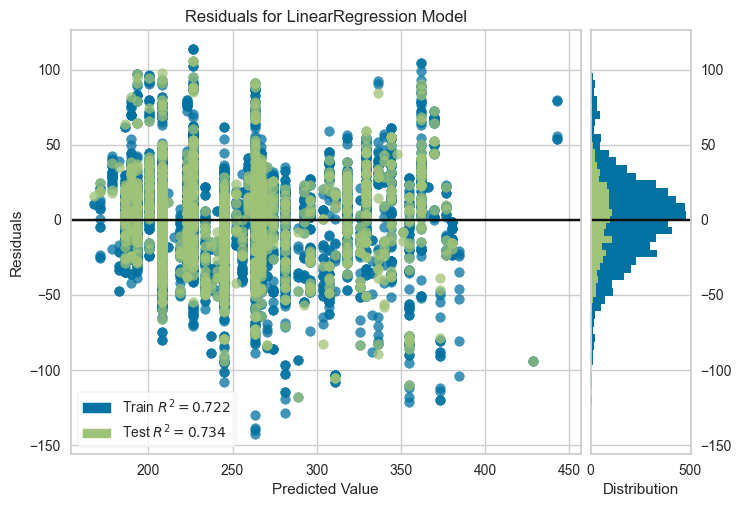

In [78]:
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

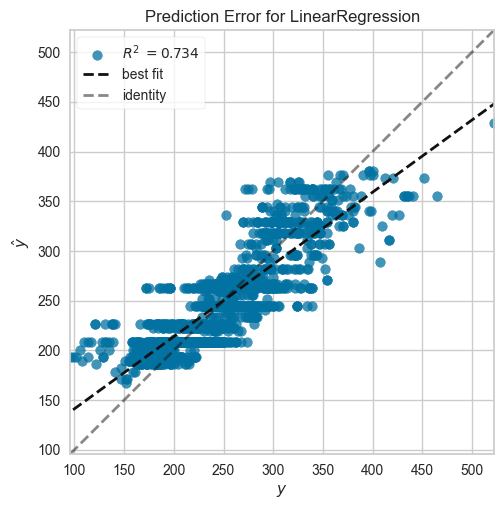

In [29]:
model = LinearRegression()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

## Multiple Lineer Regression

### Train-Test Split

In [79]:
df.columns

Index(['make', 'model', 'vehicle_class', 'engine_size', 'cylinders',
       'transmission', 'fuel_type', 'fuel_cons_city', 'fuel_cons_hwy',
       'fuel_cons_comb', 'mpgfuel_cons_comb', 'co2'],
      dtype='object')

In [80]:
X = df[["engine_size", "cylinders", "fuel_cons_comb", "mpgfuel_cons_comb"]]
y = df["co2"]

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [82]:
print("X Train features shape: {}\ny Train features shape: {}\nX Test features shape: {}\ny Test features shape: {}" 
      .format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X Train features shape: (5908, 4)
y Train features shape: (5908,)
X Test features shape: (1477, 4)
y Test features shape: (1477,)


### Multiple Lineer Regresyon

In [83]:
multi_lin_reg = LinearRegression()

In [84]:
multi_lin_reg.fit(X_train, y_train)

LinearRegression()

In [85]:
y_pred = multi_lin_reg.predict(X_test)
y_train_pred = multi_lin_reg.predict(X_train)

In [86]:
def train_val(y_train, y_train_pred, y_test, y_pred, i):
    
    scores = {i+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    i+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [87]:
multiple_linear = train_val(y_train, y_train_pred, y_test, y_pred, "multi")
multiple_linear

,multi_train,multi_test
R2,0.903380,0.900396
mae,11.427166,11.676076
mse,330.301688,342.600757
rmse,18.174204,18.509478


* As can be seen, high R2 scores were obtained with only 4 features.  (excluding categorical features)

### Cross Validation

In [88]:
model = LinearRegression()
scores = cross_validate(model, X_train, y_train,
                        scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error',
                                                            'neg_root_mean_squared_error'], cv = 10)

In [89]:
pd.DataFrame(scores, index = range(1, 11))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.007958,0.007001,0.901253,-11.450945,-338.885163,-18.408834
2,0.008068,0.004005,0.906125,-10.771034,-282.138335,-16.796974
3,0.005976,0.003028,0.905516,-11.687907,-347.007425,-18.628135
4,0.003999,0.002997,0.897220,-11.223875,-314.019278,-17.720589
5,0.006935,0.002995,0.901426,-11.740706,-344.508635,-18.560944
6,0.004000,0.001000,0.883596,-12.016296,-377.492440,-19.429165
7,0.004001,0.002002,0.917169,-10.846386,-298.239263,-17.269605
8,0.003001,0.000998,0.907901,-11.270642,-324.186084,-18.005168
9,0.003001,0.003025,0.905299,-11.173030,-306.171520,-17.497758
10,0.005988,0.001996,0.902219,-12.174987,-380.017899,-19.494048


In [90]:
scores = pd.DataFrame(scores, index=range(1,11))
scores.iloc[:, 2:].mean()

test_r2                               0.902772
test_neg_mean_absolute_error        -11.435581
test_neg_mean_squared_error        -331.266604
test_neg_root_mean_squared_error    -18.181122
dtype: float64

* The fact that this score obtained after Cross Validation and Train-test score are compatible indicates that the model has generalization ability.

## Polynomial Features (degree = 5)

In [91]:
def poly(d):
    
    train_rmse_errors = []
    test_rmse_errors = []
    number_of_features = []
    
    for i in range(1, d):
        polynomial_converter = PolynomialFeatures(degree = i, include_bias =False) ## For döngüsü döndükçe degreemiz artıyor,
        poly_features = polynomial_converter.fit_transform(X)                        # bundan dolayı feature sayımız artıyor.
        
        X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
        
        model = LinearRegression(fit_intercept=True)
        model.fit(X_train, y_train)
        
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)
        
        train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
        test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))
        
        train_rmse_errors.append(train_RMSE)
        test_rmse_errors.append(test_RMSE)
        
        number_of_features.append(poly_features.shape[1])
        
    return pd.DataFrame({"train_rmse_errors": train_rmse_errors, "test_rmse_errors":test_rmse_errors, 
                         "number of features":number_of_features}, index=range(1,d))

In [100]:
poly(8)

,train_rmse_errors,test_rmse_errors,number of features
1,18.314047,18.087420,4
2,15.788285,15.680230,14
3,14.314294,13.914205,34
4,12.916365,12.699119,69
5,12.093931,12.490365,125
6,11.139029,13.456785,209
7,19.939588,116.936156,329


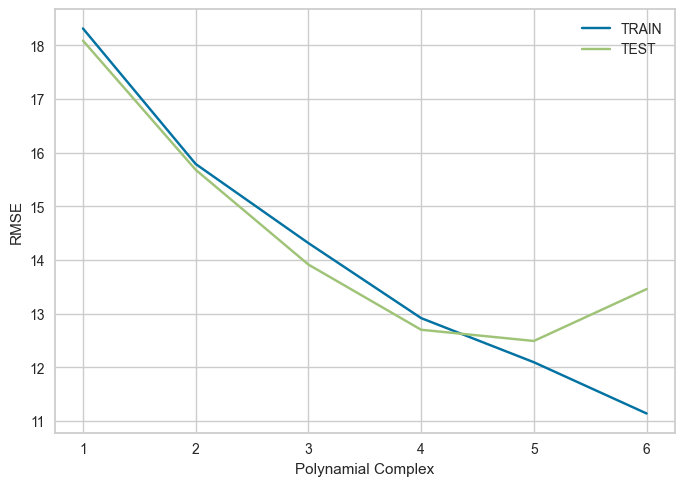

In [93]:
plt.plot(range(1,7), poly(7)["train_rmse_errors"], label = "TRAIN")
plt.plot(range(1,7), poly(7)["test_rmse_errors"], label = "TEST")
plt.xlabel("Polynamial Complex")
plt.ylabel("RMSE")
plt.legend()
plt.show()

In [94]:
# we select degree 5

poly_converter = PolynomialFeatures(degree = 5, include_bias=False)

degree=5 parametresi ile PolynomialFeatures, veri setinizdeki 4 sütunun beşinci dereceye kadar olan tüm kombinasyonlarını yaratır ve bu yeni özellikleri kullanarak modelinizi eğitir. Bu, modelin daha karmaşık ilişkileri yakalamasına olanak tanır, ancak aynı zamanda aşırı öğrenme (overfitting) riskini de artırabilir.

In [95]:
poly_lin_reg = LinearRegression()

In [96]:
X_train, X_test, y_train, y_test = train_test_split(poly_converter.fit_transform(X), y,
                                                    test_size = 0.2, random_state = 42)

In [97]:
poly_lin_reg.fit(X_train, y_train)

LinearRegression()

In [98]:
y_train_pred = poly_lin_reg.predict(X_train)
y_pred = poly_lin_reg.predict(X_test)

In [99]:
poly_multiple_linear = train_val(y_train, y_train_pred, y_test, y_pred, "poly(5)")
poly_multiple_linear

,poly(5)_train,poly(5)_test
R2,0.959309,0.950289
mae,5.721991,6.246907
mse,139.103545,170.988082
rmse,11.794217,13.076241


### poly(4)
<img src="poly(4).png">

In [101]:
result = pd.concat([multiple_linear, poly_multiple_linear], axis=1)
result

,multi_train,multi_test,poly(5)_train,poly(5)_test
R2,0.903380,0.900396,0.959309,0.950289
mae,11.427166,11.676076,5.721991,6.246907
mse,330.301688,342.600757,139.103545,170.988082
rmse,18.174204,18.509478,11.794217,13.076241


In [ ]:
poly_lin_reg = LinearRegression()
visualizer = ResidualsPlot(poly_lin_reg)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

In [ ]:
poly_lin_reg = LinearRegression()
visualizer = PredictionError(poly_lin_reg)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

## Polynomial Features (degree = 6)

In [ ]:
# select degree 6 to see the regulation operations
poly_converter2 = PolynomialFeatures(degree = 5, include_bias=False)

In [ ]:
poly_lin_reg2 = LinearRegression()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(poly_converter2.fit_transform(X), y,
                                                    test_size = 0.2, random_state = 42)

In [ ]:
poly_lin_reg2.fit(X_train, y_train)

In [ ]:
y_train_pred = poly_lin_reg2.predict(X_train)
y_pred = poly_lin_reg2.predict(X_test)

In [ ]:
poly_multiple_linear6 = train_val(y_train, y_train_pred, y_test, y_pred, "poly(6)")
poly_multiple_linear6

### Model Complexity
<img src="adsız.png">

In [103]:
result = pd.concat([result, poly_multiple_linear6], axis=1)
result

NameError: name 'poly_multiple_linear6' is not defined

* We have created overfitting with degree 6 so we can use ridge, lasso and elastic net models. Before using these models we need to standardize 

### StandardScaler

In [104]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
scaler = StandardScaler()

In [105]:
X_train.shape

(5908, 125)

In [106]:
scaler.fit(X_train)

StandardScaler()

In [107]:
X_train_scaled = scaler.transform(X_train)
X_train_scaled 

array([[-0.12149345,  0.20534188, -0.37681659, ...,  0.35226679,
        -0.019364  , -0.1356856 ],
       [ 0.6141664 ,  0.20534188,  0.59257065, ..., -0.81393547,
        -0.59551386, -0.32858827],
       [-0.12149345,  0.20534188,  0.24636092, ..., -0.51074984,
        -0.46578771, -0.29330509],
       ...,
       [ 0.24633648,  0.20534188, -0.20371173, ..., -0.1008228 ,
        -0.23040686, -0.21308828],
       [-0.48932338, -0.88513888, -0.82688924, ...,  0.81589634,
         0.43800976,  0.09824977],
       [ 0.6141664 ,  1.29582264,  0.31560287, ..., -0.39767478,
        -0.45629422, -0.29330509]])

In [108]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled 

array([[-0.12149345,  0.20534188, -0.03060686, ..., -0.1713698 ,
        -0.30851599, -0.24408244],
       [ 0.90843035,  1.29582264,  1.2849901 , ..., -1.22162471,
        -0.74707324, -0.36222023],
       [ 2.23261809,  1.29582264,  1.04264329, ..., -1.07286882,
        -0.70067811, -0.35312745],
       ...,
       [-1.29854922, -0.88513888, -1.10385702, ...,  1.12895831,
         0.85321281,  0.36618143],
       [ 0.24633648,  0.20534188, -0.27295367, ...,  0.16774045,
        -0.12417622, -0.17714605],
       [-0.85715331, -0.88513888, -0.96537313, ...,  0.78972925,
         0.54660533,  0.17738319]])

## Ridge Regression

In [109]:
from sklearn.linear_model import Ridge

In [110]:
ridge_model = Ridge(alpha=1, random_state=42)

In [111]:
ridge_model.fit(X_train_scaled, y_train) 

Ridge(alpha=1, random_state=42)

In [113]:
y_pred = ridge_model.predict(X_test_scaled)        
y_train_pred = ridge_model.predict(X_train_scaled)

In [114]:
ridge = train_val(y_train, y_train_pred, y_test, y_pred, "ridge") 
ridge

,ridge_train,ridge_test
R2,0.939933,0.931125
mae,7.281760,8.036528
mse,205.342715,236.903424
rmse,14.329784,15.391667


In [ ]:
ridge_model.coef_[:20]

In [115]:
result = pd.concat([result, ridge], axis=1)
result

,multi_train,multi_test,poly(5)_train,poly(5)_test,ridge_train,ridge_test
R2,0.903380,0.900396,0.959309,0.950289,0.939933,0.931125
mae,11.427166,11.676076,5.721991,6.246907,7.281760,8.036528
mse,330.301688,342.600757,139.103545,170.988082,205.342715,236.903424
rmse,18.174204,18.509478,11.794217,13.076241,14.329784,15.391667


### RidgeCV

In [ ]:
# Find the best alpha value with RidgeCV

alpha_space = np.linspace(0.01, 1, 100)
ridge_cv_model = RidgeCV(alphas = alpha_space, cv = 10, scoring = "neg_root_mean_squared_error")
ridge_cv_model.fit(X_train, y_train)

In [ ]:
ridge_cv_model.alpha_          # Best alpha value

In [ ]:
y_pred = ridge_cv_model.predict(X_test)
y_train_pred = ridge_cv_model.predict(X_train)

In [ ]:
ridge_cv = train_val(y_train, y_train_pred, y_test, y_pred, "ridgeCV")
ridge_cv

In [ ]:
ridge_cv_model.coef_[:20]          # Coefficients of insignificant variables approach zero

In [ ]:
ridge_model.coef_[:20]

In [ ]:
result = pd.concat([result, ridge_cv], axis=1)
result

## Lasso Regression

In [ ]:
lasso_model = Lasso(alpha = 1, random_state = 42)
lasso_model.fit(X_train_scaled, y_train)

In [ ]:
y_pred = lasso_model.predict(X_test_scaled)
y_train_pred = lasso_model.predict(X_train_scaled)

In [ ]:
lss = train_val(y_train, y_train_pred, y_test, y_pred, "lasso")
lss

In [ ]:
lasso_model.coef_             # As it is seen, the features with low importance are zero.

In [ ]:
nonzero_features = np.count_nonzero(lasso_model.coef_)         # non-zero coefficients  
nonzero_features

In [ ]:
result = pd.concat([result, lss], axis=1)
result

### LassoCV

In [102]:
# Find the best alpha value with RidgeCV

lasso_cv_model = LassoCV(alphas = alpha_space, cv = 10, max_iter=1000000, random_state=42)
lasso_cv_model.fit(X_train_scaled, y_train)

NameError: name 'alpha_space' is not defined

In [ ]:
lasso_cv_model.alpha_             # Best alpha value

In [ ]:
y_pred = lasso_cv_model.predict(X_test_scaled)           # Lasso(alpha =0.01)
y_train_pred = lasso_cv_model.predict(X_train_scaled)

In [ ]:
lasso_cv = train_val(y_train, y_train_pred, y_test, y_pred, "lassoCV")
lasso_cv

* R2 score increased with coefficient increase 

In [ ]:
lasso_cv_model.coef_ 

In [ ]:
nonzero_features = np.count_nonzero(lasso_cv_model.coef_)         # non-zero coefficients  
nonzero_features

In [ ]:
result = pd.concat([result, lasso_cv], axis=1)
result

## ElasticNet Regression

In [ ]:
elastic_model = ElasticNet(alpha = 1, l1_ratio = 0.5, random_state = 42)
elastic_model.fit(X_train_scaled, y_train)

In [ ]:
y_pred = elastic_model.predict(X_test_scaled)
y_train_pred = elastic_model.predict(X_train_scaled)

In [ ]:
elastic = train_val(y_train, y_train_pred, y_test, y_pred, "elastic")
elastic

In [ ]:
elastic_model.coef_

In [ ]:
result = pd.concat([result, elastic], axis=1)
result

### ElasticNET CV

In [ ]:
# Find the best alpha and l1_ratio values

elastic_cv_model = ElasticNetCV(alphas = alpha_space, l1_ratio=[0.1, 0.5, 0.7,0.9, 0.95, 1], cv = 10, 
                                max_iter = 1000000,random_state=42)

In [ ]:
elastic_cv_model.fit(X_train_scaled, y_train)

In [ ]:
elastic_cv_model.alpha_          # Best alpha value

In [ ]:
elastic_cv_model.l1_ratio_       # Best l1_ratio value (l1_ratio : ridge as it approaches 0, lasso as it approaches 1)

In [ ]:
y_pred = elastic_cv_model.predict(X_test_scaled)
y_train_pred = elastic_cv_model.predict(X_train_scaled)

In [ ]:
elastic_cv = train_val(y_train, y_train_pred, y_test, y_pred, "elasticCV")
elastic_cv

In [ ]:
nonzero_features = np.count_nonzero(elastic_cv_model.coef_)         # non-zero coefficients  
nonzero_features                                                    # same coefficient as lassoCV (28)

In [ ]:
result = pd.concat([result, elastic_cv], axis=1)   
result

In [ ]:
result.T

* lassoCV and elasticCV have the same R2 scores  (because elasticCV l1_ratio parameter is 1)

## Grid Search

* l1 = LASSO

* l2 = RIDGE

* l1 = 05 = lasso + ridge

* Let's do with GridSearch what we did with elasticCV

In [ ]:
elastic_model = ElasticNet(max_iter=100000, random_state=42)

In [ ]:
param_grid = {"alpha":[0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
            "l1_ratio":[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]}

In [ ]:
grid_model = GridSearchCV(estimator = elastic_model, 
                          param_grid = param_grid, 
                          scoring = 'neg_root_mean_squared_error',
                          cv =5, verbose =2)

In [ ]:
grid_model.fit(X_train_scaled, y_train)

In [ ]:
# I interrupted GridSearch because it takes too much time 

In [ ]:
grid_model.best_params_ 

In [ ]:
grid_model.best_index_                # Let's access the index number of the best candidate

In [ ]:
grid_model.best_score_

In [ ]:
best_model = grid_model.best_estimator_  # Modeli tanımladık

In [ ]:
best_model.coef_    # Katsayıları getirir

### Using Best Hyper Parameters From GridSearch

In [ ]:
y_pred = grid_model.predict(X_test_scaled)          # ElasticNet(alpha= 0.01, l1_ratio= 1)
y_train_pred = grid_model.predict(X_train_scaled)

In [ ]:
gridsearch = train_val(y_train, y_train_pred, y_test, y_pred, "GridSearch")
gridsearch

In [ ]:
result = pd.concat([result, gridsearch], axis=1)   
result

## Final Model

In [ ]:
final_scaler = StandardScaler()
X_scaled = final_scaler.fit_transform(poly_converter2.fit_transform(X))

In [ ]:
final_model = Lasso(alpha=0.01)      # Lasso model built over 28 features with our best alpha value 

In [ ]:
final_model.fit(X_scaled, y)

* Continuing with polynomial features degree 6, the best score (test = 0.9290) is LassoCV with 28 features (alpha= 0.01)

* Continuing with polynomial features degree 5, the best score (test = 0.9502) is Multiple Linear Regression with 125 features.

## Feature importances with Ridge

In [ ]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz  ## figsize gibi işlem yapıyor

viz = FeatureImportances(ridge_cv_model, labels=pd.DataFrame(X_train_scaled).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train_scaled, y_train)
viz.show()

## Feature importances with Lasso

In [ ]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

viz = FeatureImportances(lasso_cv_model, labels=pd.DataFrame(X_train_scaled).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train_scaled, y_train)
viz.show()